In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [136]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [137]:
dfI = iris.iloc[:, [0,1,2,3]].values #[0]id ,[1]SepalLength, [2]SepalWidth, [3]PetalLength

In [138]:
dfI

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

C:\Users\Sparrow\anaconda3\envs\Tgpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sparrow\anaconda3\envs\Tgpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Error')

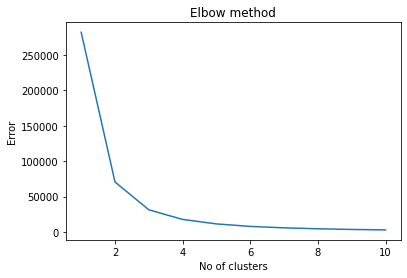

In [139]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(dfI)
    kmeans.fit(dfI)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')

#so according to graph k value is 3
#lets calculate for k=3

In [140]:
iris = datasets.load_iris()

In [141]:
#data load only sepal_length[x] and sepal_width[y]
df=pd.DataFrame({
    'x':iris.data[:,0],
    'y':iris.data[:,1],
    'cluster':iris.target
})

In [142]:
df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Text(0, 0.5, 'Sepal Width')

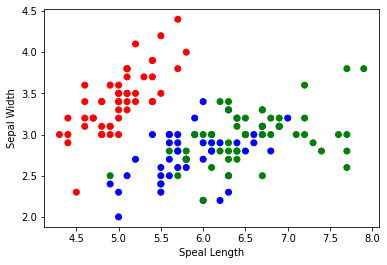

In [143]:
color= np.array(['red','blue','green'])
plt.scatter(df['x'], df['y'], c=color[iris.target])
plt.xlabel('Speal Length')
plt.ylabel('Sepal Width')

In [144]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [145]:
centroids

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

In [146]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
def calD2p(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [147]:
df = calD2p(df, centroids)

In [148]:
#df

In [149]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [150]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = calD2p(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

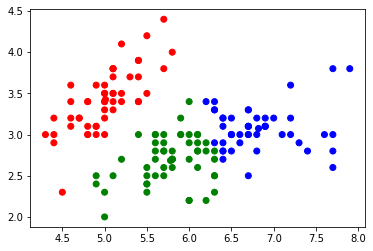

In [151]:
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
